<font size=3>This notebook has the distribution of the coupling values and the bises.</font>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import itertools
import copy
import seaborn as sns

import sys
sys.path.append('../../')

from dim import utils

In [ ]:
# Load dmrf
with open('../../dim/gen_data/dmrf_tetramer_20_4.dmrf', 'rb') as f:
    dmrfs = pickle.load(f)

/home/nami/anaconda3/envs/dgm/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/nami/anaconda3/envs/dgm/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.3.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


<code>self-coupling</code> and <code>bias</code> distribution

In [5]:
self_couplings = {'A':[],'T':[],'G':[],'C':[]}
bias_Na = {'A':[],'T':[],'G':[],'C':[]}

for i in dmrfs.keys():
    for j in dmrfs[i]:
        self_couplings[i[1]].append(j.get_subsystem_couplings()[0,0])
        self_couplings[i[2]].append(j.get_subsystem_couplings()[1,1])
        self_couplings[utils.complementary(i)[1]].append(j.get_subsystem_couplings()[2,2])
        self_couplings[utils.complementary(i)[2]].append(j.get_subsystem_couplings()[3,3])
        bias_Na[i[1]].append(j.get_subsystem_biases()[0])
        bias_Na[i[2]].append(j.get_subsystem_biases()[1])
        bias_Na[utils.complementary(i)[1]].append(j.get_subsystem_biases()[2])
        bias_Na[utils.complementary(i)[2]].append(j.get_subsystem_biases()[3])

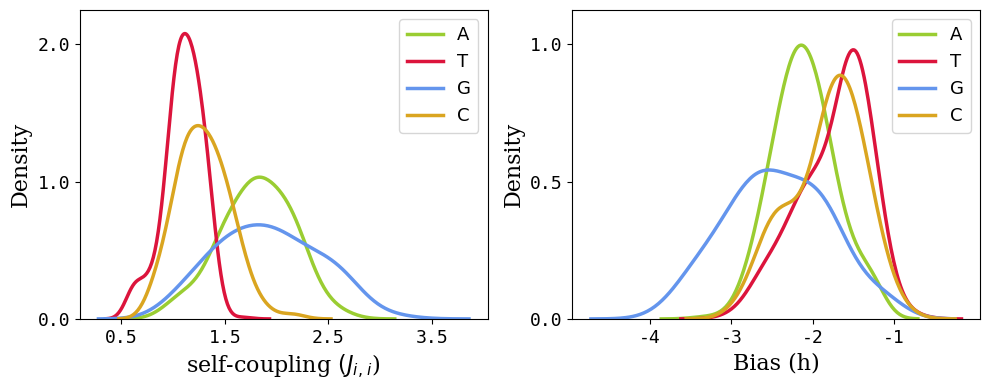

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
colors = ['yellowgreen', 'crimson', 'cornflowerblue', 'goldenrod']

# Plotting self-couplings with KDE
for x, i in enumerate(['A', 'T', 'G', 'C']):
    sns.kdeplot(self_couplings[i], ax=ax[0], color=colors[x], label=i, linewidth=2.5, bw_adjust=1.5)

# Plotting biases with KDE
for x, i in enumerate(['A', 'T', 'G', 'C']):
    sns.kdeplot(bias_Na[i], ax=ax[1], color=colors[x], label=i, linewidth=2.5, bw_adjust=1.5)


ax[0].legend(fontsize=13)
ax[0].set_yticks(np.arange(0, 2.1, 1.0))
ax[0].set_yticklabels(np.arange(0, 2.1, 1.0), fontsize=13, family='monospace')
ax[0].set_xticks(np.arange(0.5, 3.8, 1))
ax[0].set_xticklabels(np.arange(0.5, 3.8, 1), fontsize=13, family='monospace')
ax[0].set_ylabel('Density', fontsize=16, family='serif')
ax[0].set_xlabel('self-coupling ' + r'$(J_i$$_,$$_i$)', fontsize=16, family='serif')


ax[1].legend(fontsize=13)
ax[1].set_yticks(np.arange(0, 1.5, 0.5))
ax[1].set_yticklabels(np.arange(0, 1.5, 0.5), fontsize=13, family='monospace')
ax[1].set_xticks(np.arange(-4, 0, 1))
ax[1].set_xticklabels(np.arange(-4, 0, 1), fontsize=13, family='monospace')
ax[1].set_ylabel('Density', fontsize=16, family='serif')
ax[1].set_xlabel('Bias (h)', fontsize=16, family='serif')

ax[0].set_ylim(0,2.25)
ax[1].set_ylim(0,1.125)

plt.tight_layout()
# plt.savefig("dim_parameter_distribution.png", dpi=800, bbox_inches='tight', transparent=True)
plt.show()

> Pyrimidines show lower positive coupling: higher affinity to N_pucker in water

> Pyrimidines show lower negative bias: higher affinity to N_pucker in water
> Guanine has higher negative bias: higher affinity to S_pucker in water